In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Understanding the Data

In [2]:
# assign correct column names as we read in the data
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                "marital_status", "occupation", "relationship", "race", "sex",
               "capital_gain", "capital_loss", "hours_per_week", "native_country",
               "salary_over_50k"]
df_train = pd.read_csv("adult/adult.data", names=column_names)

In [3]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_over_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  salary_over_50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_train.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
salary_over_50k    0
dtype: int64

All features of all instances contain non-null values, removing the need for replacing nulls. This allows us to continue directly to analysis of the data through visualisation.

## Preprocessing and Visualising the Data

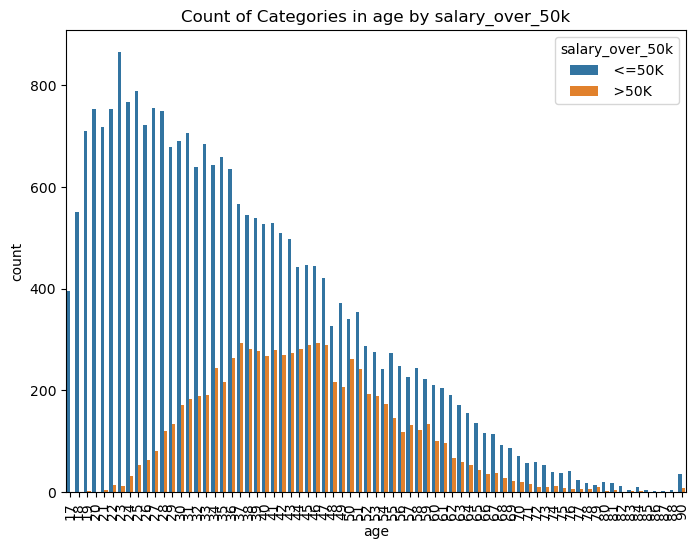

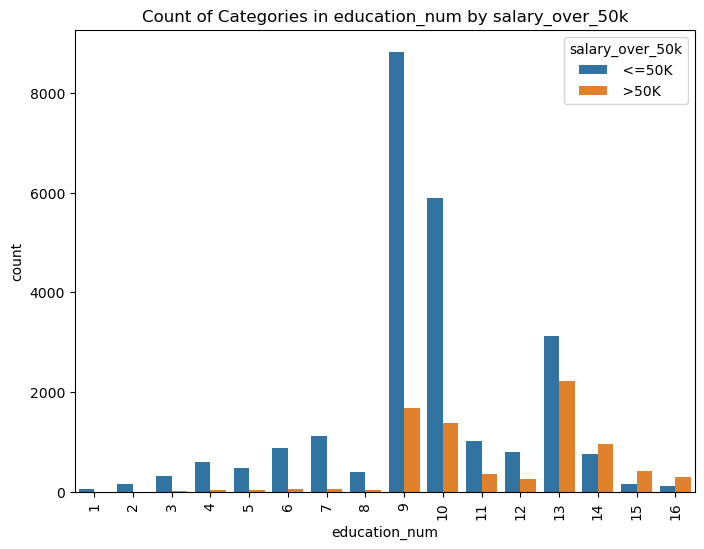

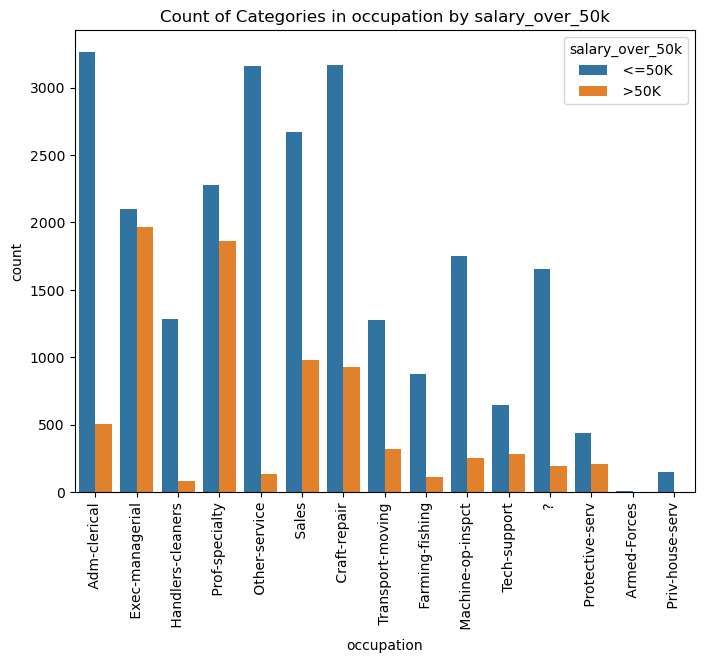

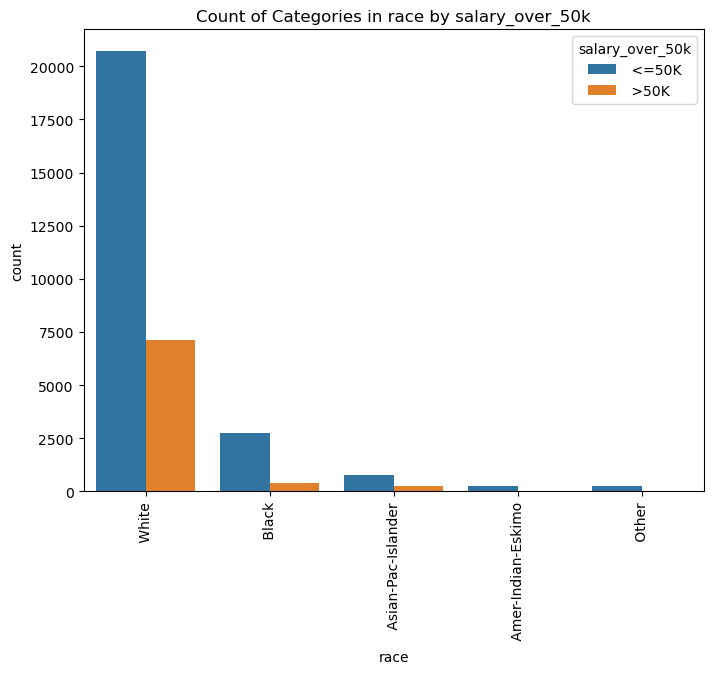

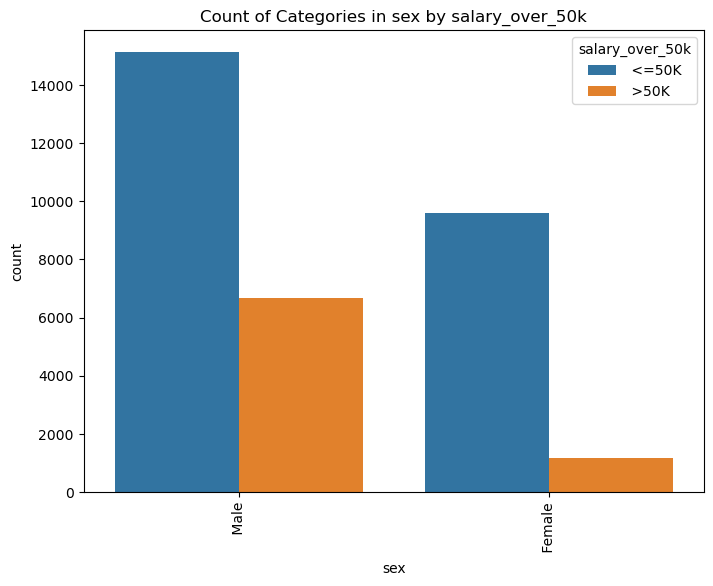

In [6]:
# taking features we assume will be useful, we can visualise each category
# against the label as a series of histograms

useful_cols = ["age", "education_num", "occupation", "race", "sex"]

target = 'salary_over_50k'

# loop through each feature and create a countplot
for feature in useful_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue=target, data=df_train)
    plt.title(f'Count of Categories in {feature} by {target}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.show()

From these histograms, we can gain valuable insights into the data.

We see that as age increases, the proportion of people earning over 50k per year increases up to around age 50. Beyond this, the proportion again decreases, likely due to changes in career as people approach retirement age or continue to work rather than retiring.

The second histogram is quite intuitive - as the level of education increases, the proportion of people earning an annual salary of over 50k increases.

Analysis of occupations shows that earnings differ depending on the type of job, with 'Exec-managerial' and 'Prof-specialty' being occupations with a high proportion of high-salary earners, and 'Handlers-cleaners' and 'Other-service' being examples of lower-paid occupations overall.

While the majority of data subjects were white, the histogram shows a greater proportion of salaries over 50k for these people than the next most frequent respondent race. 'Asian-Pac-Islander' appears to have a similar proportion to 'White', though there is far less data on this category, and same for 'Amer-Indian-Eskimo' and 'Other' races, so this requires further investigation through correlation.

The final histogram shows clearly that a higher proportion of males earn over 50k annually than females.

In [7]:
# we do not need 2 education columns, so we drop the one that is not numeric
df_train.drop(['education'],axis=1,inplace = True)

non_numeric_cols = ["workclass", "marital_status", "occupation", "relationship",
                    "race", "sex", "native_country", "salary_over_50k"]

# non-numeric features are converted to categorical for correlation visualistion
# and to be used by each machine learning model
for col in non_numeric_cols:
    df_train[col]=df_train[col].astype('category').cat.codes

In [8]:
salary_corr_list = []

# -1 = perfect negative correlation, 0 = no correlation, 1 = perfect positive correlation
# each value is appended to a list for later visualisation
for col in df_train.columns:
    salary_corr_list.append(df_train[col].corr(df_train["salary_over_50k"]))

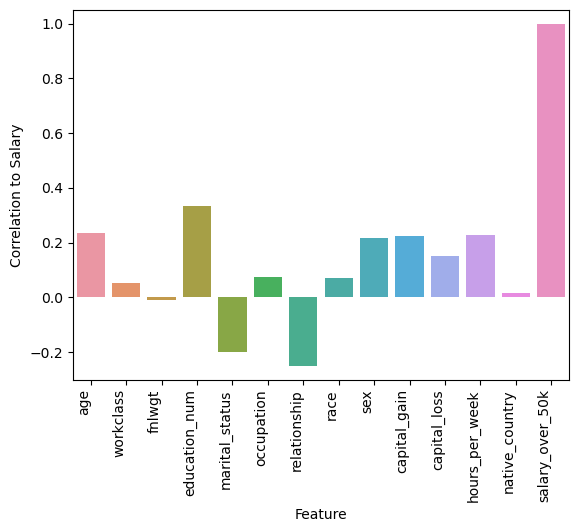

In [9]:
# visualise correlation between each column and salary as a bar plot
df_salary_corr = pd.DataFrame({'Feature': df_train.columns, 'Correlation to Salary': salary_corr_list})

# create bar plot
ax = sns.barplot(x='Feature', y='Correlation to Salary', data=df_salary_corr)

# rotate labels on x axis so they don't overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# set y-axis limits to better fit the range of values
ax.set_ylim(-0.3, 1.05)

# display the plot
plt.show()

Many of these features have a strong positive or negative correlation to the label. 'fnlwgt' and 'native_country' both have negligible correlation so may be dropped in future, although in this project we will compare the results of machine learning with and without them to see differences in accuracy.

'education_num' represents the level of education in increasing order, although in converting 'education' to numeric values, they are not in order. For this reason, we will drop the 'education' column.

In [11]:
df_test = pd.read_csv("adult/adult.test", names=column_names)
df_test = df_test.drop(df_test.index[0])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16281 non-null  object 
 1   workclass        16281 non-null  object 
 2   fnlwgt           16281 non-null  float64
 3   education        16281 non-null  object 
 4   education_num    16281 non-null  float64
 5   marital_status   16281 non-null  object 
 6   occupation       16281 non-null  object 
 7   relationship     16281 non-null  object 
 8   race             16281 non-null  object 
 9   sex              16281 non-null  object 
 10  capital_gain     16281 non-null  float64
 11  capital_loss     16281 non-null  float64
 12  hours_per_week   16281 non-null  float64
 13  native_country   16281 non-null  object 
 14  salary_over_50k  16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [12]:
df_test.drop(['education'],axis=1,inplace = True)

non_numeric_cols = ["workclass", "marital_status", "occupation", "relationship",
                    "race", "sex", "native_country", "salary_over_50k"]

# non-numeric features are converted to categorical for correlation visualistion
# and to be used by each machine learning model
for col in non_numeric_cols:
    df_test[col]=df_test[col].astype('category').cat.codes

In [13]:
# separate the dataframes again into features and labels for training/testing
train_features = df_train.drop(columns=['salary_over_50k'])
train_labels = df_train.loc[:, ['salary_over_50k']]

test_features = df_test.drop(columns=['salary_over_50k'])
test_labels = df_test.loc[:, ['salary_over_50k']]

In [14]:
train_features.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,13,2,10,5,2,0,0,0,40,5


In [15]:
train_labels.head()

,salary_over_50k
0,0
1,0
2,0
3,0
4,0


In [16]:
test_features.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
1,25,4,226802.0,7.0,4,7,3,2,1,0.0,0.0,40.0,38
2,38,4,89814.0,9.0,2,5,0,4,1,0.0,0.0,50.0,38
3,28,2,336951.0,12.0,2,11,0,4,1,0.0,0.0,40.0,38
4,44,4,160323.0,10.0,2,7,0,2,1,7688.0,0.0,40.0,38
5,18,0,103497.0,10.0,4,0,3,4,0,0.0,0.0,30.0,38


In [17]:
test_labels.head()

,salary_over_50k
1,0
2,0
3,1
4,1
5,0


## Training each Machine Learning Model

In this project, we will be comparing the accuracy of different machine learning models. These will be evaluated through standard metrics of accuracy and F1 score, with the distribution of predictions being visualised as confusion matrices.
The models to be used are as follows:
- SVM (with kernel giving best accuracy)
- Decision Tree
- Random Forest
- Naive Bayes
- ANN